# KMeans: пример

Кластеризируем iris данные.

In [14]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [64]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [65]:
X, y = iris['data'], iris['target']

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

labels = iris_kmeans.predict(X)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [27]:
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the Iris Dataset Clusters: 0.55


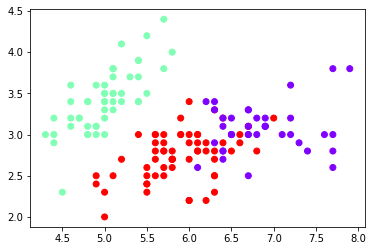

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.show()

## Elbow метод

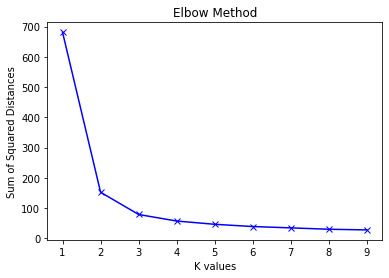

In [36]:

K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k).fit(X)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Видим, что оптимальным значением будет К=3.

# DBSCAN: пример

In [31]:
from sklearn.cluster import DBSCAN

In [55]:
iris_dbscan = DBSCAN(eps=0.8, min_samples=5)
iris_dbscan.fit(X)
labels = iris_dbscan.labels_
# label = -1 означает, что точка является выбросом. Остальные значения представляют собой номер метки / кластера, начиная с 0.
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [46]:
# Находим количество полученных кластеров
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [47]:
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

s = metrics.silhouette_score(X, iris_dbscan.labels_)
print(f'Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}')

Estimated number of clusters: 2
Estimated number of noise points: 17
Silhouette Coefficient for the Iris Dataset Clusters: 0.49


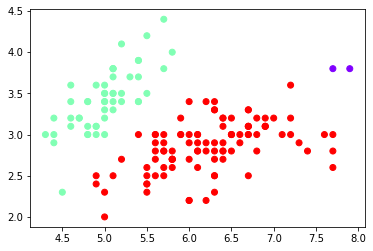

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.show()

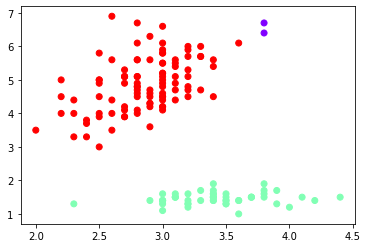

In [53]:
plt.scatter(X[:, 1], X[:, 2], c=labels, cmap='rainbow')
plt.show()

# Hierarchical Agglomerative Clustering: пример

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Single linkage

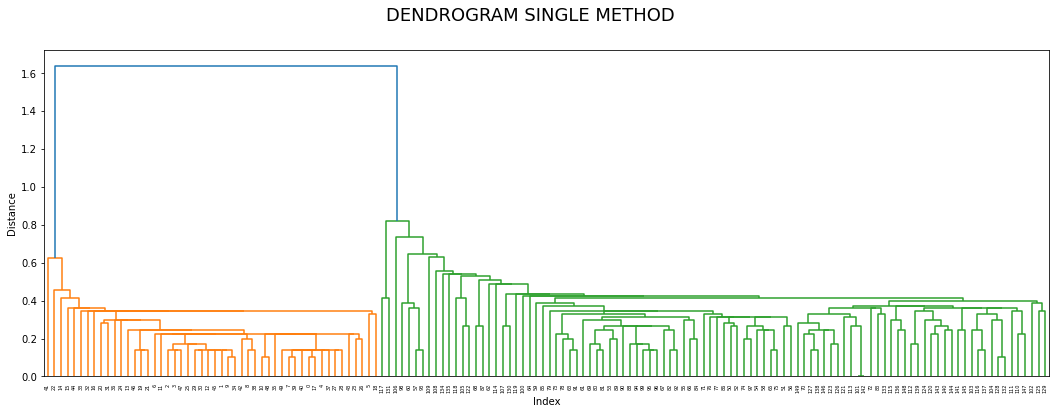

In [67]:
dist_sin = linkage(X,method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()


Видим, что выделяется чётко два кластера.

In [107]:
iris_df = pd.DataFrame(X, columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

In [108]:
iris_df['species'] = iris.target

Построим кластеризацию на 2 и 3 кластера, а потом сравним.

In [77]:
?fcluster

In [109]:
iris_df['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
iris_df['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

In [81]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),2_clust,3_clust
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1


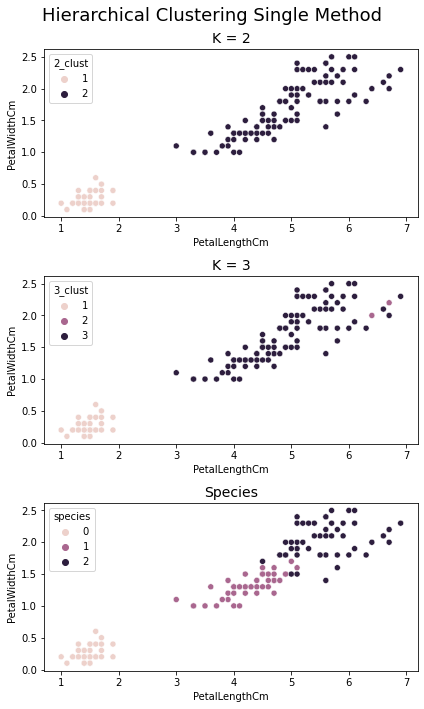

In [112]:
import seaborn as sns

plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_df, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_df, hue="3_clust")

plt.subplot(3,1,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_df, hue="species")
plt.tight_layout();

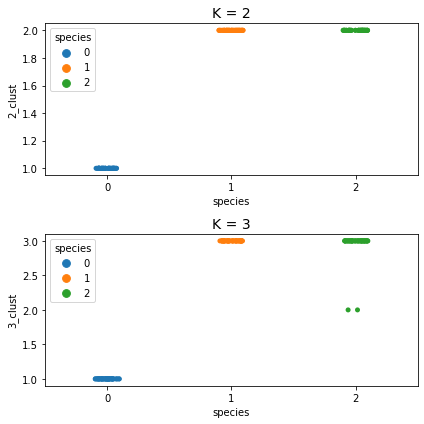

In [129]:
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.title("K = 2",fontsize=14)
sns.stripplot(x="species",y="2_clust", data=iris_df, hue="species")

plt.subplot(2,1,2)
plt.title("K = 3",fontsize=14)
sns.stripplot(x="species",y="3_clust", data=iris_df, hue="species")
plt.tight_layout();

Видим, что переход от 2 кластеров к 3 не имеет значения, дополнительный кластер не является репрезентативным.

Как и ожидалось, есть один вид, четко классифицируемый этим методом, однако два других вида не разделяются надлежащим образом при использовании иерархической кластеризации 
с методом «Single» linkage.

Попробуем итерпретировать полученные кластера:

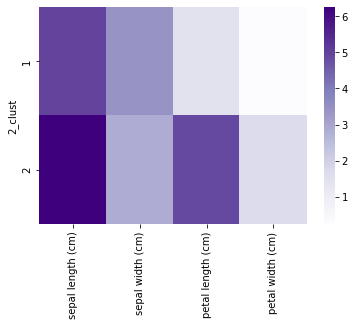

In [104]:
sns.heatmap(iris_df.drop(['3_clust', 'species'], axis=1).groupby(['2_clust']).mean(), cmap="Purples");

Кластер 1: маленькие лепестки и толстые чашелистики.  
Кластер 2: длинные лепестки и длинные чашелистики. 

petal - лепесток, sepal - чашелистик.

Можно ещё интерпретировать так:

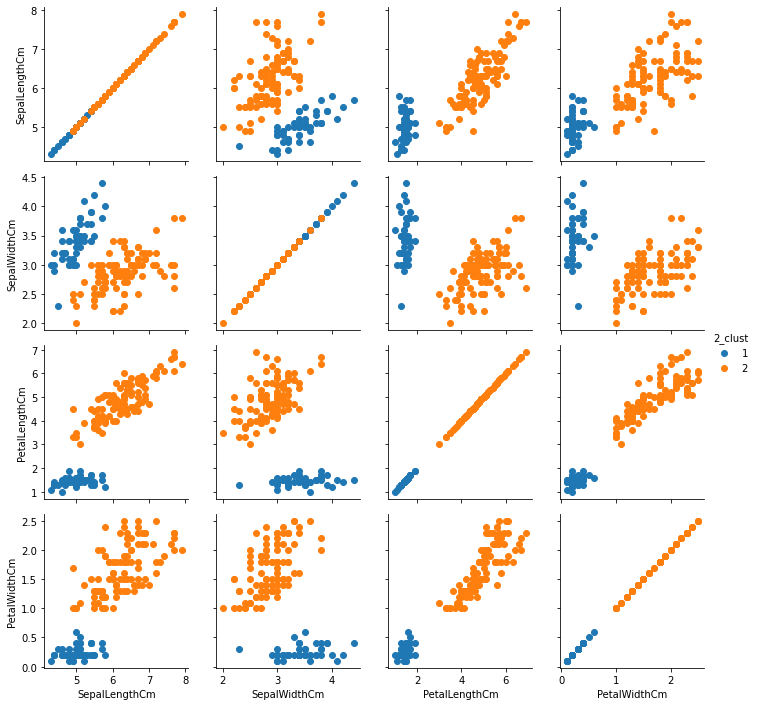

In [114]:
g = sns.PairGrid(iris_df, vars=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], hue='2_clust')
g.map(plt.scatter)
g.add_legend();

## Complete linkage

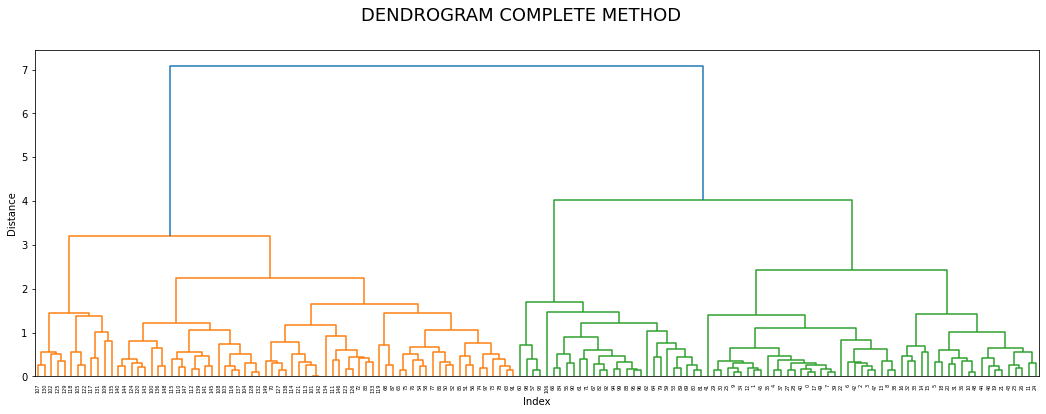

In [117]:
dist_comp = linkage(iris_df["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"], method="complete")

plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18) 
plt.show()

Использование «Complete» метода для иерархической кластеризации, по-видимому, предполагает наличие 2 или 3 кластеров.

Давайте посмотрим, насколько хорошо эти кластеры воспроизводят таксономические виды цветов ириса.

In [119]:
iris_df['2_clust_CM']=fcluster(dist_comp, 2, criterion='maxclust')
iris_df['3_clust_CM']=fcluster(dist_comp, 3, criterion='maxclust')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species,2_clust,3_clust,2_clust_CM,3_clust_CM
0,5.1,3.5,1.4,0.2,0,1,1,2,3
1,4.9,3.0,1.4,0.2,0,1,1,2,3
2,4.7,3.2,1.3,0.2,0,1,1,2,3
3,4.6,3.1,1.5,0.2,0,1,1,2,3
4,5.0,3.6,1.4,0.2,0,1,1,2,3


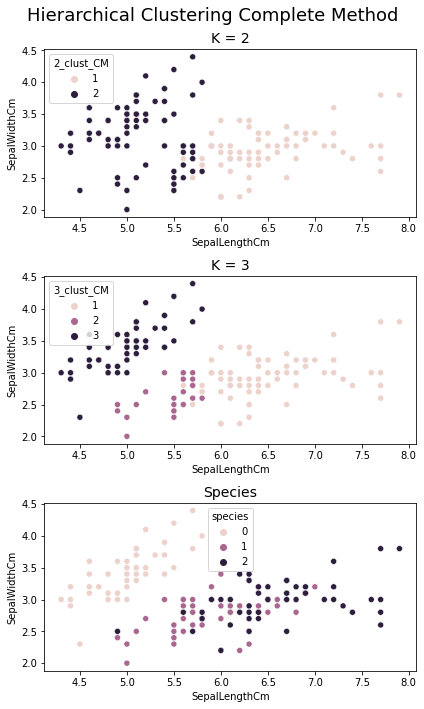

In [121]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Complete Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_df, hue="2_clust_CM")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_df, hue="3_clust_CM")

plt.subplot(3,1,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_df, hue="species")
plt.tight_layout();

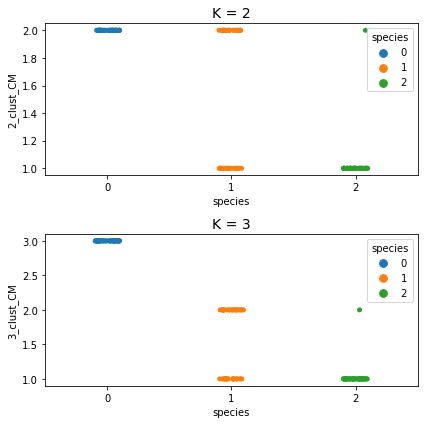

In [128]:
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.title("K = 2",fontsize=14)
sns.stripplot(x="species", y="2_clust_CM", data=iris_df, hue="species")

plt.subplot(2,1,2)
plt.title("K = 3",fontsize=14)
sns.stripplot(x="species", y="3_clust_CM", data=iris_df, hue="species")
plt.tight_layout();

In [130]:
pd.crosstab(iris_df["species"],iris_df["3_clust_CM"])

3_clust_CM,1,2,3
species,,,
0,0,0,50
1,23,27,0
2,49,1,0


В этом случае два кластера, кажется, не работают как хорошее разделение между тремя видами.

Использование трех кластеров позволяет разделить все экземпляры iris-setosa в один кластер и все, кроме одного экземпляра iris-virginica, в другой.

В этом случае использование метода «Complete» для иерархической кластеризации дает лучшие результаты, чем метод «Single».
Однако данные iris-versicolor по-прежнему проблематичны для алгоритма.

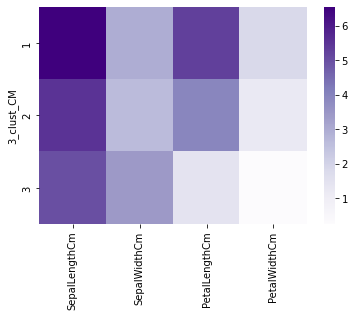

In [132]:
sns.heatmap(iris_df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","3_clust_CM"]].groupby(['3_clust_CM']).mean(), cmap="Purples");

Тепловая карта показывает, что разделение кластеров показывает убывающие значения для ширины и длины лепестка, а также длины чашелистка.   
При этом цветы в группе 3 являются меньшими, а цветы в группе 1 - более крупными.  

Кластер 1: самые большие цветы: у этих цветов самые большие лепестки и более длинные чашелистики из набора данных.  
Кластер 2: цветы среднего размера.  
Кластер 3: маленький цветок.  

# Анализ силуэт метрик и выбор оптимального количества кластеров

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

Генерируем демонстрационные данные с помощью make_blobs
Этот конкретный параметр имеет один отдельный кластер и 3 кластера, расположенных рядом
вместе.

In [58]:
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)

Изобразим сгенерированные данные.

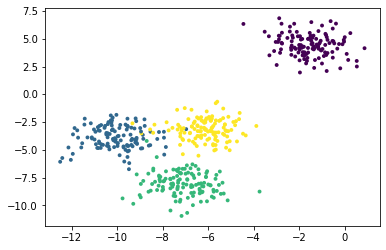

In [63]:
plt.scatter(
    X[:, 0], X[:, 1], marker=".", s=60, lw=0, c=y, edgecolor="k"
);

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


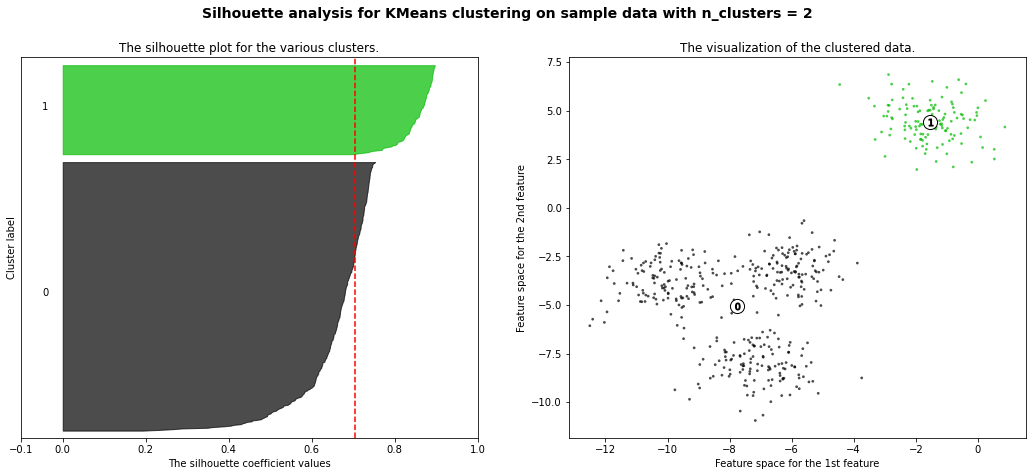

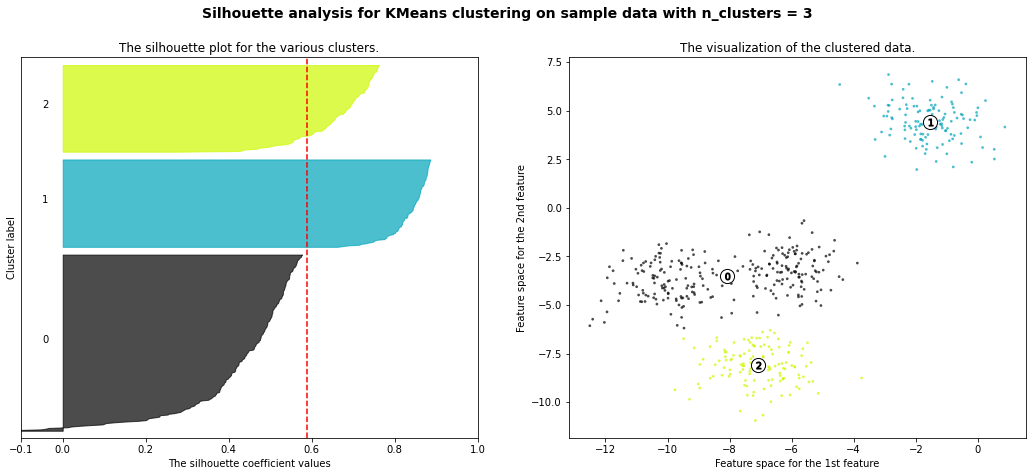

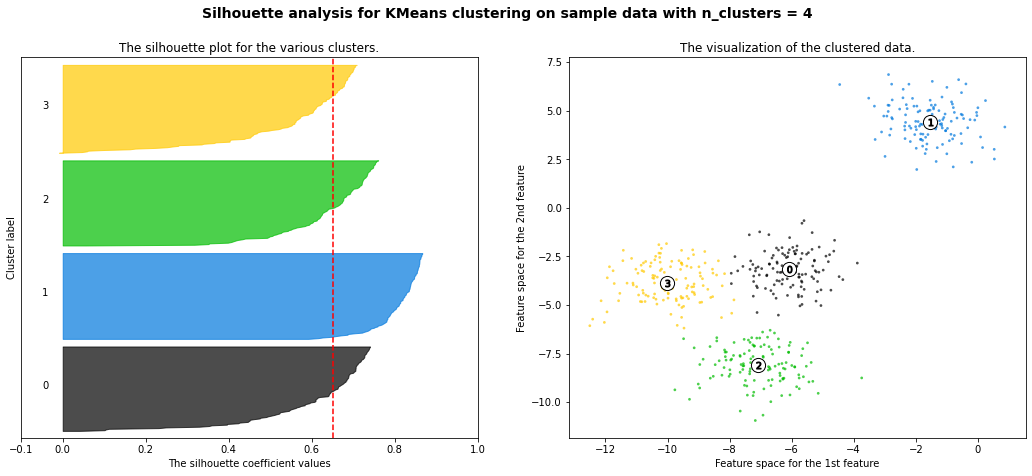

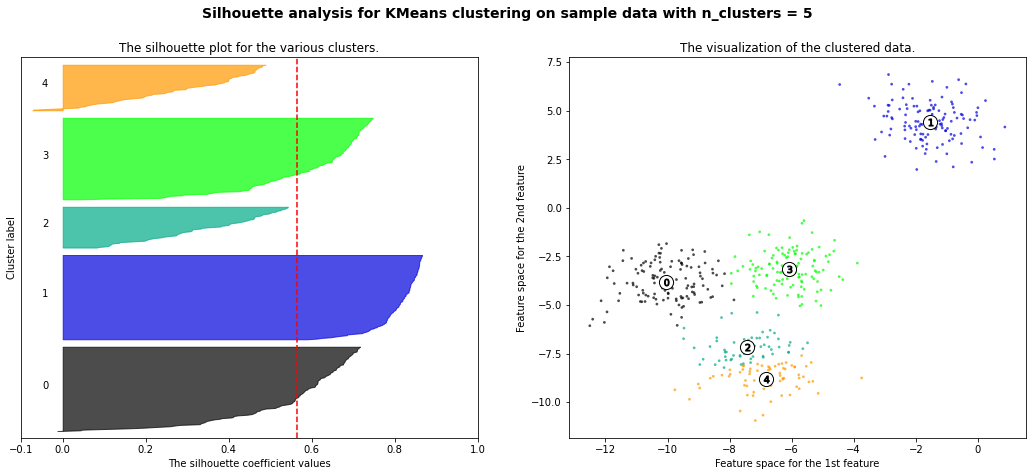

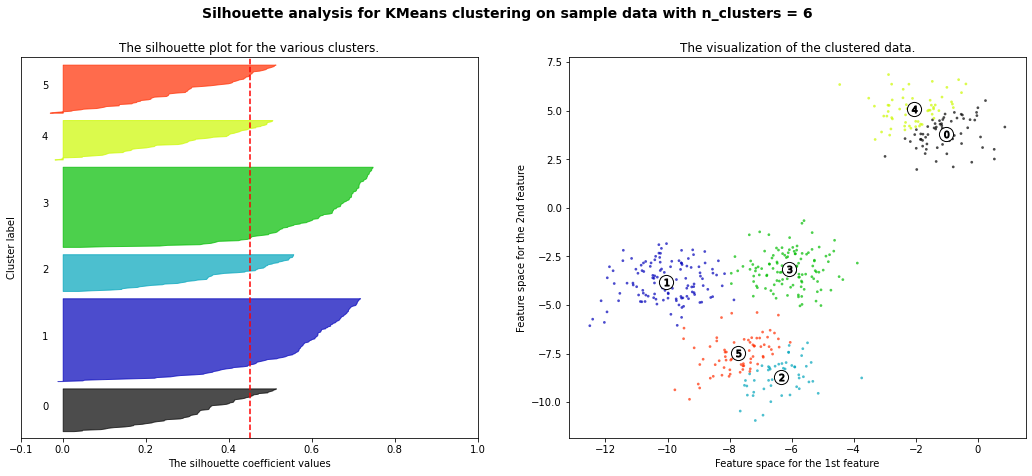

In [5]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й субграфик - это силуэтный сюжет. Коэффициент силуэта может варьироваться от -1, 1, но в этом примере все лежат в пределах [-0.1, 1].
    ax1.set_xlim([-0.1, 1])
    # (N_clusters + 1) * 10 предназначен для вставки пустого пространства между графиками силуэтов отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Инициируем кластеризатор
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Считаем ситулэт метрику для каждого экземпляра в наборе данных
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Агрегация оценки силуэтов для образцов, принадлежащих кластеру i и их сортировка
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Обозначим силуэтные участки номерами кластеров посередине.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Вычислим новый y_lower для следующего графика
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия - средний балл по силуэту всех значений.
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2-й субграфик, показывающий фактические сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Лейблы кластеров
    centers = clusterer.cluster_centers_
    # Белые кружочки в центре кластеров
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

В этом примере анализ силуэта используется для выбора оптимального значения для n_clusters. График силуэта показывает, что значения n_clusters 3, 5 и 6 - плохой выбор для этих данных из-за наличия кластеров с оценками силуэта ниже среднего, а также из-за значительных колебаний в размере графиков силуэта. 
А вот между 2 и 4 кластерами выбрать сложнее.

Также по толщине силуэта можно увидеть размер кластера. График силуэта для кластера 0, когда n_clusters равно 2, больше по размеру из-за группирования 3 субкластеров в один большой кластер. Однако, когда n_clusters равно 4, все графики имеют более или менее одинаковую толщину и, следовательно, имеют аналогичные размеры, что также можно проверить на помеченном графике разброса справа.